In [1]:
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import scipy
from spectral_analysis_functions import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata


In [2]:
# Charger les tableaux 
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/2016/Results/2025/no_white_cap/')

 # PWL
U_PWL = np.load('U_PWL.npy')
V_PWL = np.load('V_PWL.npy')

lat_PWL=np.load('lat_PWL.npy')
lon_PWL=np.load('lon_PWL.npy')

C_PWL=np.load('C_PWL.npy')


# PMW
U_PWM = np.load('U_PWM.npy')
V_PWM = np.load('V_PWM.npy')

lat_PWM=np.load('lat_PWM.npy')
lon_PWM=np.load('lon_PWM.npy')

C_PWM=np.load('C_PWM.npy')

# # PWN

U_PWN = np.load('U_PWN.npy')
V_PWN = np.load('V_PWN.npy')

lat_PWN=np.load('lat_PWN.npy')
lon_PWN=np.load('lon_PWN.npy')

C_PWN=np.load('C_PWN.npy')

# # PXL

U_PXL = np.load('U_PXL.npy')
V_PXL = np.load('V_PXL.npy')

lat_PXL=np.load('lat_PXL.npy')
lon_PXL=np.load('lon_PXL.npy')

C_PXL=np.load('C_PXL.npy')


# PXM

U_PXM = np.load('U_PXM.npy')
V_PXM = np.load('V_PXM.npy')

lat_PXM=np.load('lat_PXM.npy')
lon_PXM=np.load('lon_PXM.npy')

C_PXM=np.load('C_PXM.npy')


# # PXN

U_PXN = np.load('U_PXN.npy')
V_PXN = np.load('V_PXN.npy')

lat_PXN=np.load('lat_PXN.npy')
lon_PXN=np.load('lon_PXN.npy')

C_PXN=np.load('C_PXN.npy')


# # PYL

U_PYL = np.load('U_PYL.npy')
V_PYL = np.load('V_PYL.npy')

lat_PYL=np.load('lat_PYL.npy')
lon_PYL=np.load('lon_PYL.npy')

C_PYL=np.load('C_PYL.npy')

# # PYM

U_PYM = np.load('U_PYM.npy')
V_PYM = np.load('V_PYM.npy')

lat_PYM=np.load('lat_PYM.npy')
lon_PYM=np.load('lon_PYM.npy')

C_PYM=np.load('C_PYM.npy')


# # PYN

U_PYN = np.load('U_PYN.npy')
V_PYN = np.load('V_PYN.npy')

lat_PYN=np.load('lat_PYN.npy')
lon_PYN=np.load('lon_PYN.npy')

C_PYN=np.load('C_PYN.npy')




In [3]:
# Fonction de filtrage par magnitude
def filter_vectors(lon, lat, U, V, C, threshold):
    magnitude = np.sqrt(U**2 + V**2)
    mask = magnitude <= threshold
    return lon[mask], lat[mask], U[mask], V[mask], C[mask]

magnitude_threshold =3# Ajuster ce seuil en fonction des données

In [4]:
lon_PWL1, lat_PWL1, U_PWL1, V_PWL1, C_PWL1 = filter_vectors(lon_PWL, lat_PWL, U_PWL, V_PWL, C_PWL, magnitude_threshold)
lon_PWM1, lat_PWM1, U_PWM1, V_PWM1, C_PWM1 = filter_vectors(lon_PWM, lat_PWM, U_PWM, V_PWM, C_PWM, magnitude_threshold)
lon_PWN1, lat_PWN1, U_PWN1, V_PWN1, C_PWN1 = filter_vectors(lon_PWN, lat_PWN, U_PWN, V_PWN, C_PWN, magnitude_threshold)

lon_PXL1, lat_PXL1, U_PXL1, V_PXL1, C_PXL1 = filter_vectors(lon_PXL, lat_PXL, U_PXL, V_PXL, C_PXL, magnitude_threshold)
lon_PXM1, lat_PXM1, U_PXM1, V_PXM1, C_PXM1 = filter_vectors(lon_PXM, lat_PXM, U_PXM, V_PXM, C_PXM, magnitude_threshold)
lon_PXN1, lat_PXN1, U_PXN1, V_PXN1, C_PXN1 = filter_vectors(lon_PXN, lat_PXN, U_PXN, V_PXN, C_PXN, magnitude_threshold)

lon_PYL1, lat_PYL1, U_PYL1, V_PYL1, C_PYL1 = filter_vectors(lon_PYL, lat_PYL, U_PYL, V_PYL, C_PYL, magnitude_threshold)
lon_PYM1, lat_PYM1, U_PYM1, V_PYM1, C_PYM1 = filter_vectors(lon_PYM, lat_PYM, U_PYM, V_PYM, C_PYM, magnitude_threshold)
lon_PYN1, lat_PYN1, U_PYN1, V_PYN1, C_PYN1 = filter_vectors(lon_PYN, lat_PYN, U_PYN, V_PYN, C_PYN, magnitude_threshold)


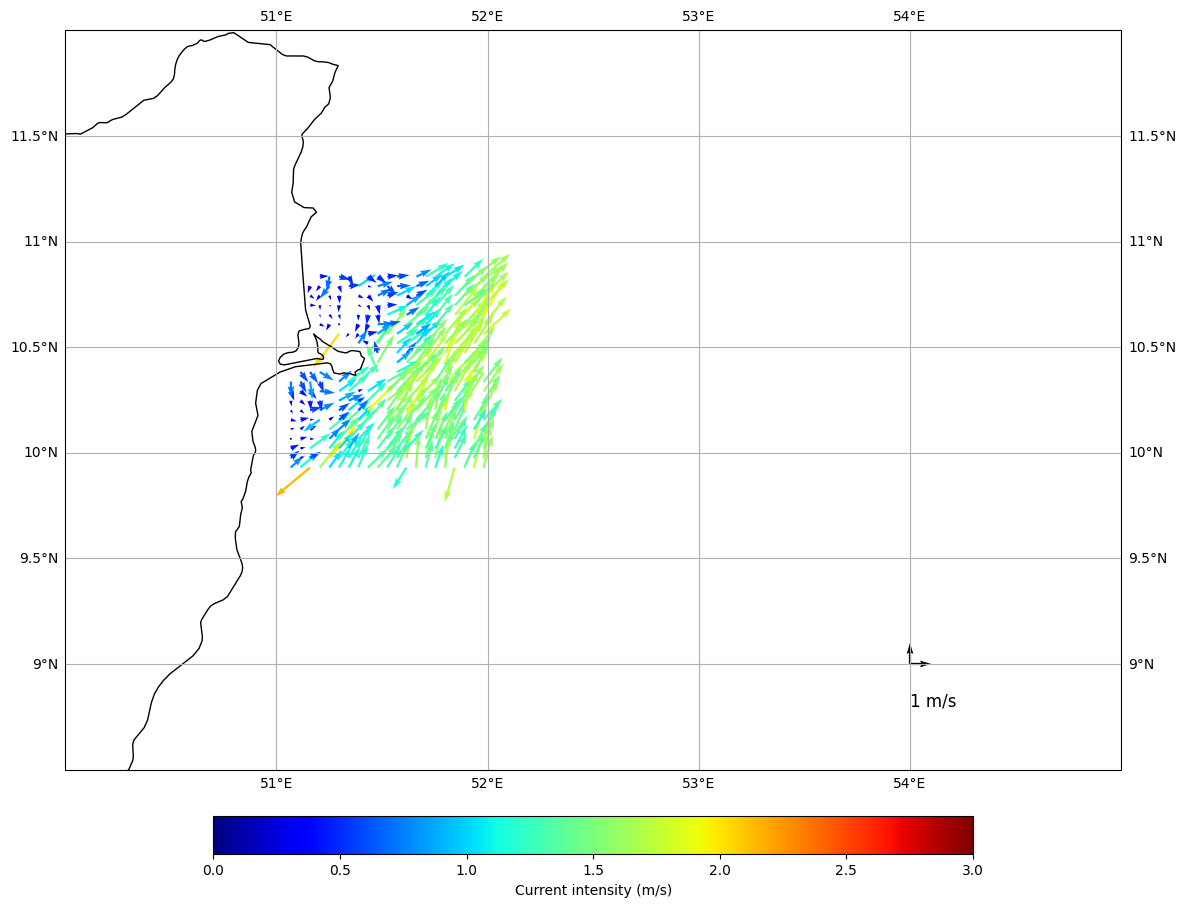

In [12]:
thick = 0.0021
scale_quiver = 50
vmin=0
vmax=magnitude_threshold
nb_pt=1

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/2016/Results/2025/no_white_cap/')

fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
# q9 = ax.quiver(lon_PWL1, lat_PWL1, U_PWL1, V_PWL1, C_PWL1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

q1 = ax.quiver(lon_PWM1, lat_PWM1, U_PWM1, V_PWM1, C_PWM1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 
               
# q2 = ax.quiver(lon_PWN1, lat_PWN1, U_PWN1, V_PWN1, C_PWN1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# q3 = ax.quiver(lon_PXL1, lat_PXL1, U_PXL1, V_PXL1, C_PXL1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# q4 = ax.quiver(lon_PXM1, lat_PXM1, U_PXM1, V_PXM1, C_PXM1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# q5 = ax.quiver(lon_PXN1, lat_PXN1, U_PXN1, V_PXN1, C_PXN1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# q6 = ax.quiver(lon_PYL1, lat_PYL1, U_PYL1, V_PYL1, C_PYL1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# q7 = ax.quiver(lon_PYM1, lat_PYM1, U_PYM1, V_PYM1, C_PYM1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree()) 

# q8 = ax.quiver(lon_PYN1, lat_PYN1, U_PYN1, V_PYN1, C_PYN1,scale=scale_quiver, width=thick, cmap='jet',clim=(vmin, vmax), transform=ccrs.PlateCarree())



# Créer une normalisation basée sur les valeurs combinées
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])

# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05,shrink=0.7)
cbar.set_label('Current intensity (m/s)')

# Ajouter les côtes
ax.add_feature(cfeature.COASTLINE)

ax.quiver(54, 9, 1, 0, scale=scale_quiver, color='black', width=thick, transform=ccrs.PlateCarree(), label='Horizontal')
ax.quiver(54, 9, 0, 1, scale=scale_quiver, color='black', width=thick, transform=ccrs.PlateCarree(), label='Vertical')

ax.text(54, 8.8, '1 m/s', fontsize=12, color='black', transform=ccrs.PlateCarree())


# Configuration des axes
ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')

ax.set_xlim(50, 55)
ax.set_ylim(8.5, 12)
ax.gridlines(draw_labels=True)
# plt.savefig('current_map_AC3.png')
plt.show()

# Combiner scatter et quiver

## Normaliser les vecteurs

In [6]:
# Fonction de filtrage par magnitude
def non_zero(lon, lat, U, V, C):
    mask = (lon != 0) & (lat != 0) 
    return lon[mask], lat[mask], U[mask], V[mask], C[mask]


In [7]:
lon_PWL10, lat_PWL10, U_PWL10, V_PWL10, C_PWL10=non_zero(lon_PWL1, lat_PWL1, U_PWL1, V_PWL1, C_PWL1)
lon_PWM10, lat_PWM10, U_PWM10, V_PWM10, C_PWM10=non_zero(lon_PWM1, lat_PWM1, U_PWM1, V_PWM1, C_PWM1)
lon_PWN10, lat_PWN10, U_PWN10, V_PWN10, C_PWN10=non_zero(lon_PWN1, lat_PWN1, U_PWN1, V_PWN1, C_PWN1)

lon_PXL10, lat_PXL10, U_PXL10, V_PXL10, C_PXL10=non_zero(lon_PXL1, lat_PXL1, U_PXL1, V_PXL1, C_PXL1)
lon_PXM10, lat_PXM10, U_PXM10, V_PXM10, C_PXM10=non_zero(lon_PXM1, lat_PXM1, U_PXM1, V_PXM1, C_PXM1)
lon_PXN10, lat_PXN10, U_PXN10, V_PXN10, C_PXN10=non_zero(lon_PXN1, lat_PXN1, U_PXN1, V_PXN1, C_PXN1)

lon_PYL10, lat_PYL10, U_PYL10, V_PYL10, C_PYL10=non_zero(lon_PYL1, lat_PYL1, U_PYL1, V_PYL1, C_PYL1)
lon_PYM10, lat_PYM10, U_PYM10, V_PYM10, C_PYM10=non_zero(lon_PYM1, lat_PYM1, U_PYM1, V_PYM1, C_PYM1)
lon_PYN10, lat_PYN10, U_PYN10, V_PYN10, C_PYN10=non_zero(lon_PYN1, lat_PYN1, U_PYN1, V_PYN1, C_PYN1)




In [8]:
U_PWL_norm=U_PWL10/C_PWL10
V_PWL_norm=V_PWL10/C_PWL10

U_PWM_norm=U_PWM10/C_PWM10
V_PWM_norm=V_PWM10/C_PWM10

U_PWN_norm=U_PWN10/C_PWN10
V_PWN_norm=V_PWN10/C_PWN10

U_PXL_norm=U_PXL10/C_PXL10
V_PXL_norm=V_PXL10/C_PXL10

U_PXM_norm=U_PXM10/C_PXM10
V_PXM_norm=V_PXM10/C_PXM10

U_PXN_norm=U_PXN10/C_PXN10
V_PXN_norm=V_PXN10/C_PXN10


U_PYL_norm=U_PYL10/C_PYL10
V_PYL_norm=V_PYL10/C_PYL10

U_PYM_norm=U_PYM10/C_PYM10
V_PYM_norm=V_PYM10/C_PYM10

U_PYN_norm=U_PYN10/C_PYN10
V_PYN_norm=V_PYN10/C_PYN10

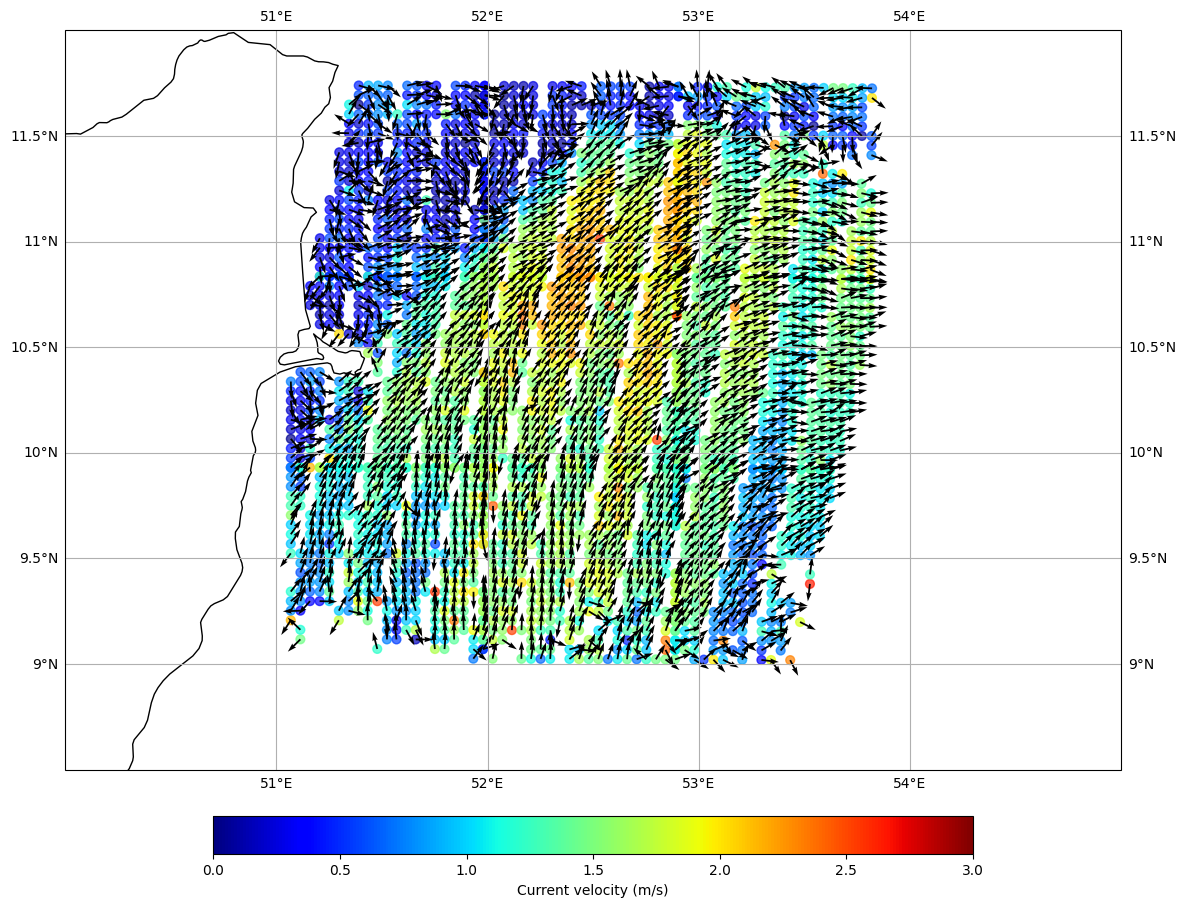

In [9]:
thick = 0.0017
scale_quiver = 60
vmin=0
vmax=magnitude_threshold
nb_pt=1
size=40
a=0.7

fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})

sc2 = ax.scatter(lon_PWL10[::nb_pt], lat_PWL10[::nb_pt], c=C_PWL10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc1 = ax.scatter(lon_PWM10[::nb_pt], lat_PWM10[::nb_pt], c=C_PWM10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc3 = ax.scatter(lon_PWN10[::nb_pt], lat_PWN10[::nb_pt], c=C_PWN10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc4 = ax.scatter(lon_PXL10[::nb_pt], lat_PXL10[::nb_pt], c=C_PXL10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc5 = ax.scatter(lon_PXM10[::nb_pt], lat_PXM10[::nb_pt], c=C_PXM10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc6 = ax.scatter(lon_PXN10[::nb_pt], lat_PXN10[::nb_pt], c=C_PXN10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc7 = ax.scatter(lon_PYL10[::nb_pt], lat_PYL10[::nb_pt], c=C_PYL10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc8 = ax.scatter(lon_PYM10[::nb_pt], lat_PYM10[::nb_pt], c=C_PYM10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())
sc3 = ax.scatter(lon_PYN10[::nb_pt], lat_PYN10[::nb_pt], c=C_PYN10[::nb_pt], cmap='jet',clim=(vmin, vmax), s=size,alpha=a,transform=ccrs.PlateCarree())

q2 = ax.quiver(lon_PWL10[::nb_pt], lat_PWL10[::nb_pt], U_PWL_norm[::nb_pt], V_PWL_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q1 = ax.quiver(lon_PWM10[::nb_pt], lat_PWM10[::nb_pt], U_PWM_norm[::nb_pt], V_PWM_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q3 = ax.quiver(lon_PWN10[::nb_pt], lat_PWN10[::nb_pt], U_PWN_norm[::nb_pt], V_PWN_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q4 = ax.quiver(lon_PXL10[::nb_pt], lat_PXL10[::nb_pt], U_PXL_norm[::nb_pt], V_PXL_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q5 = ax.quiver(lon_PXM10[::nb_pt], lat_PXM10[::nb_pt], U_PXM_norm[::nb_pt], V_PXM_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q6 = ax.quiver(lon_PXN10[::nb_pt], lat_PXN10[::nb_pt], U_PXN_norm[::nb_pt], V_PXN_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q7 = ax.quiver(lon_PYL10[::nb_pt], lat_PYL10[::nb_pt], U_PYL_norm[::nb_pt], V_PYL_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q8 = ax.quiver(lon_PYM10[::nb_pt], lat_PYM10[::nb_pt], U_PYM_norm[::nb_pt], V_PYM_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q9 = ax.quiver(lon_PYN10[::nb_pt], lat_PYN10[::nb_pt], U_PYN_norm[::nb_pt], V_PYN_norm[::nb_pt],scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())




# Créer une normalisation basée sur les valeurs combinées
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])

# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
cbar.set_label('Current velocity (m/s)')



# Ajouter les côtes
ax.add_feature(cfeature.COASTLINE)

# Configuration des axes
ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')

ax.set_xlim(50, 55)
ax.set_ylim(8.5, 12)

# Ajouter une grille
ax.gridlines(draw_labels=True)
# plt.savefig("current_map_AC.png", format="png", dpi=300)  # dpi pour la résolution
# Affichage de la carte
plt.show()


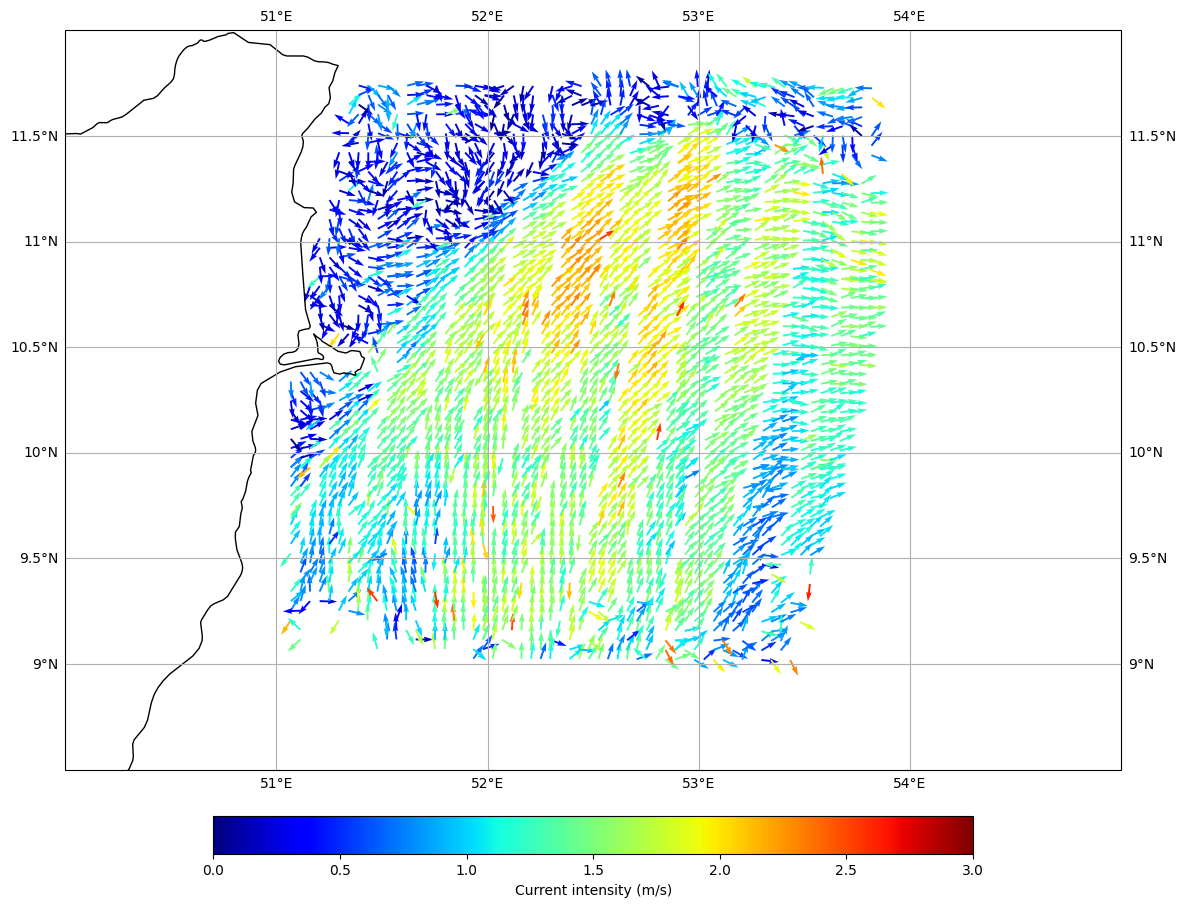

In [10]:
os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/2016/Results/2025/no_white_cap/')

thick = 0.0018
scale_quiver = 60
vmin=0
vmax=magnitude_threshold
nb_pt=1
size=40
a=0.6

fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})

q2 = ax.quiver(lon_PWL10[::nb_pt], lat_PWL10[::nb_pt], U_PWL_norm[::nb_pt], V_PWL_norm[::nb_pt],C_PWL10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q1 = ax.quiver(lon_PWM10[::nb_pt], lat_PWM10[::nb_pt], U_PWM_norm[::nb_pt], V_PWM_norm[::nb_pt],C_PWM10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q3 = ax.quiver(lon_PWN10[::nb_pt], lat_PWN10[::nb_pt], U_PWN_norm[::nb_pt], V_PWN_norm[::nb_pt],C_PWN10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q4 = ax.quiver(lon_PXL10[::nb_pt], lat_PXL10[::nb_pt], U_PXL_norm[::nb_pt], V_PXL_norm[::nb_pt],C_PXL10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q5 = ax.quiver(lon_PXM10[::nb_pt], lat_PXM10[::nb_pt], U_PXM_norm[::nb_pt], V_PXM_norm[::nb_pt],C_PXM10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q6 = ax.quiver(lon_PXN10[::nb_pt], lat_PXN10[::nb_pt], U_PXN_norm[::nb_pt], V_PXN_norm[::nb_pt],C_PXN10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q7 = ax.quiver(lon_PYL10[::nb_pt], lat_PYL10[::nb_pt], U_PYL_norm[::nb_pt], V_PYL_norm[::nb_pt],C_PYL10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q8 = ax.quiver(lon_PYM10[::nb_pt], lat_PYM10[::nb_pt], U_PYM_norm[::nb_pt], V_PYM_norm[::nb_pt],C_PYM10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
q9 = ax.quiver(lon_PYN10[::nb_pt], lat_PYN10[::nb_pt], U_PYN_norm[::nb_pt], V_PYN_norm[::nb_pt],C_PYN10,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())

# Créer une normalisation basée sur les valeurs combinées
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])

# Ajouter la colorbar globale à la figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
cbar.set_label('Current intensity (m/s)')



# Ajouter les côtes
ax.add_feature(cfeature.COASTLINE)

# Configuration des axes
ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')

ax.set_xlim(50, 55)
ax.set_ylim(8.5, 12)

# Ajouter une grille
ax.gridlines(draw_labels=True)
# plt.savefig("current_map_AC2.png", format="png", dpi=300)  # dpi pour la résolution
# Affichage de la carte
plt.show()


In [11]:
# # Charger les tableaux 
# os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/2016/Results/2025/no_white_cap_test2/')

#  # PWL
# U_PWN2 = np.load('U_PYL.npy')
# V_PWN2 = np.load('V_PYL.npy')

# lat_PWN2=np.load('lat_PYL.npy')
# lon_PWN2=np.load('lon_PYL.npy')

# C_PWN2=np.load('C_PYL.npy')

# lon_PWN21, lat_PWN21, U_PWN21, V_PWN21, C_PWN21 = filter_vectors(lon_PWN2, lat_PWN2, U_PWN2, V_PWN2, C_PWN2, magnitude_threshold)
# lon_PWN20, lat_PWN20, U_PWN20, V_PWN20, C_PWN20=non_zero(lon_PWN21, lat_PWN21, U_PWN21, V_PWN21, C_PWN21)

# U_PWN_norm2=U_PWN20/C_PWN20
# V_PWN_norm2=V_PWN20/C_PWN20


# thick = 0.0018
# scale_quiver = 60
# vmin=0
# vmax=magnitude_threshold
# nb_pt=1
# size=40
# a=0.6

# fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# q2 = ax.quiver(lon_PWN20[::nb_pt], lat_PWN20[::nb_pt], U_PWN_norm2[::nb_pt], V_PWN_norm2[::nb_pt],C_PWN20,cmap='jet',clim=(vmin, vmax),scale=scale_quiver, width=thick,transform=ccrs.PlateCarree())
# # Créer une normalisation basée sur les valeurs combinées
# norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
# sm.set_array([])

# # Ajouter la colorbar globale à la figure
# cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
# cbar.set_label('Current velocity (m/s)')



# # Ajouter les côtes
# ax.add_feature(cfeature.COASTLINE)

# # Configuration des axes
# ax.set_xlabel('Longitude [°]')
# ax.set_ylabel('Latitude [°]')

# ax.set_xlim(50, 55)
# ax.set_ylim(8.5, 12)

# # Ajouter une grille
# ax.gridlines(draw_labels=True)
# # plt.savefig("current_map_AC2.png", format="png", dpi=300)  # dpi pour la résolution
# # Affichage de la carte
# plt.show()
